In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
## To find missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Result: There are no missing values in the dataset

In [7]:
## List of numeric variable

numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']
print("Total number of features",df.shape[1])
print("Number of numerical features:",len(numerical_features))
print(numerical_features)
df[numerical_features].head()

Total number of features 9
Number of numerical features: 5
['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


In [8]:
## Temporal variable (Datetime variable)

df['Current year'] = 2021
df['diff_inyears'] = df['Current year'] - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current year,diff_inyears
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [9]:
df.drop(['Year'],axis=1,inplace = True)

In [10]:
df.drop(['Current year'],axis=1,inplace = True)

In [11]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,diff_inyears
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [12]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']
numerical_features

['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'diff_inyears']

In [13]:
## Numeric variable has 2 types
## Continuous and discreet variables 

discreet_features = [feature for feature in numerical_features if len(df[feature].unique())<=25]
print(discreet_features)

['Owner', 'diff_inyears']


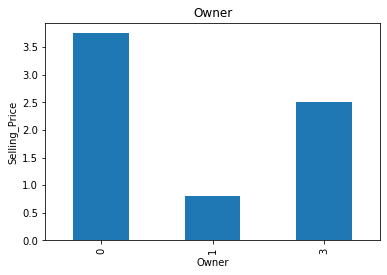

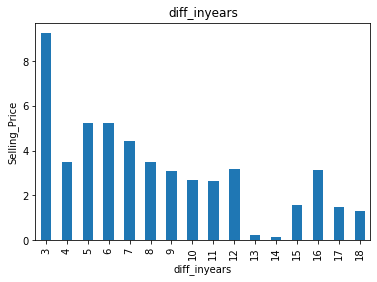

In [14]:
## Let's find the relation between discreet variable and the selling price

for feature in discreet_features:
    data = df.copy()
    data.groupby(feature)['Selling_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Selling_Price')
    plt.title(feature)
    plt.show()

Result: It seems that the vehicles belonging to owner 0 have the highest selling price

In [15]:
## Continuous variable

continuous_feature = [feature for feature in numerical_features if feature not in discreet_features]
continuous_feature

['Selling_Price', 'Present_Price', 'Kms_Driven']

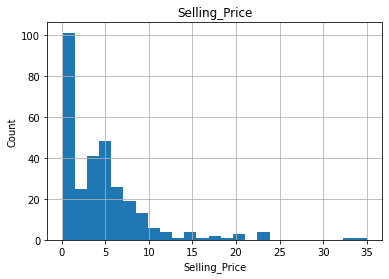

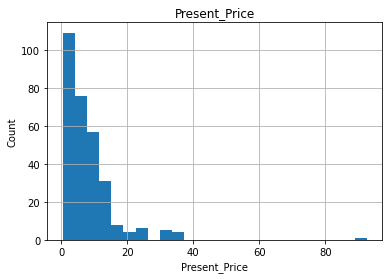

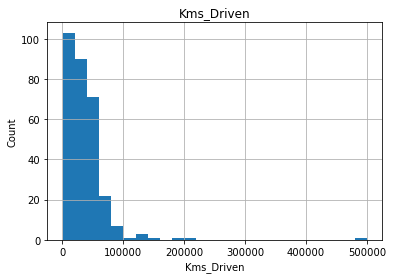

In [16]:
## Relationship between continuous feature and selling price

for feature in continuous_feature:
    data = df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

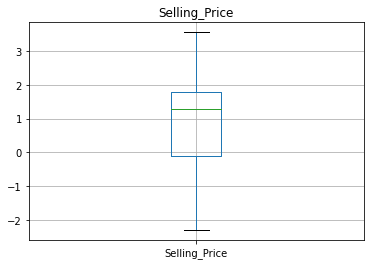

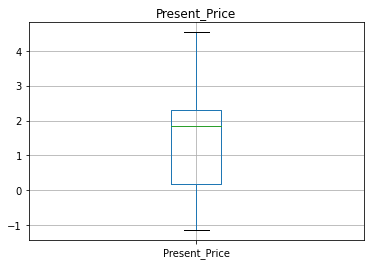

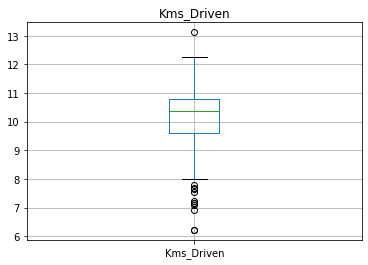

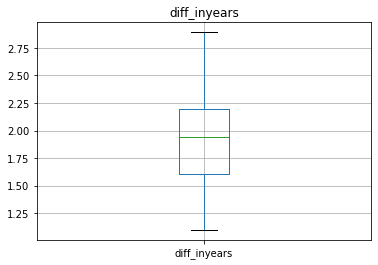

In [17]:
## Outliers

for feature in numerical_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.title(feature)
        plt.show()

In [18]:
df.shape

(301, 9)

Outliers seems to be present in Kms_driven, Thus removing outliers using quantile method

In [19]:
min_threshold,max_threshold = df['Kms_Driven'].quantile([0.01,0.99])
min_threshold,max_threshold

(1200.0, 142000.0)

In [20]:
df[df['Kms_Driven']<min_threshold]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,diff_inyears
133,Bajaj Avenger 220,0.72,0.95,500,Petrol,Individual,Manual,0,5
165,Activa 3g,0.45,0.54,500,Petrol,Individual,Automatic,0,5
166,Hero Passion Pro,0.45,0.55,1000,Petrol,Individual,Manual,0,5


In [21]:
df[df['Kms_Driven']> max_threshold]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,diff_inyears
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,16
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,11
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,13


In [22]:
df.drop([133,165,166,84,179,196],axis=0,inplace=True)

In [23]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,diff_inyears
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [24]:
df[131:135]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,diff_inyears
132,Bajaj Avenger 220,0.75,0.95,3500,Petrol,Individual,Manual,0,4
134,TVS Apache RTR 160,0.65,0.81,11800,Petrol,Individual,Manual,0,4
135,Bajaj Pulsar 150,0.65,0.74,5000,Petrol,Individual,Manual,0,6
136,Honda CBR 150,0.65,1.20,23500,Petrol,Individual,Manual,0,7


In [25]:
df.shape

(295, 9)

In [26]:
## Categorical variables

categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

Since Car_Name will not be useful in the dataset, we are dropping 

In [27]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [28]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['Fuel_Type', 'Seller_Type', 'Transmission']

In [29]:
df[categorical_features].head()

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


In [30]:
for feature in categorical_features:
    print('Feature: {}, Categories:{}'.format(feature,df[feature].unique()))

Feature: Fuel_Type, Categories:['Petrol' 'Diesel' 'CNG']
Feature: Seller_Type, Categories:['Dealer' 'Individual']
Feature: Transmission, Categories:['Manual' 'Automatic']


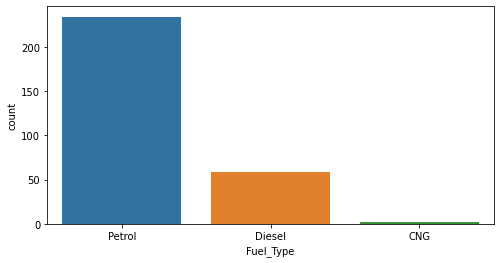

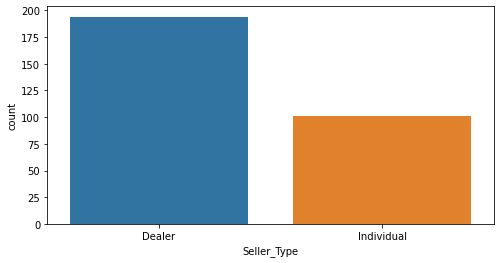

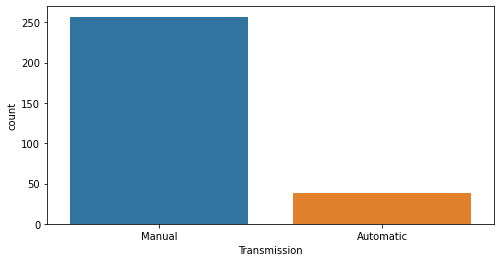

In [31]:
for i in categorical_features:
    fig = plt.figure(figsize=[8,4])
    sns.countplot(x=df[i],data=df)
    plt.show()    

Result: Petrol and manual cars higher counts

Since number of categories is less, we will be using one hot encoding technique

In [32]:
df = pd.get_dummies(df,drop_first=True)

In [33]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,diff_inyears,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [34]:
## Correlation
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,diff_inyears,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878904,0.118645,-0.091533,-0.239000,0.555116,-0.542888,-0.544381,-0.389622
Present_Price,0.878904,1.000000,0.373193,0.006129,0.044430,0.469141,-0.460821,-0.503490,-0.371414
Kms_Driven,0.118645,0.373193,1.000000,0.159721,0.623594,0.270973,-0.273195,-0.250794,-0.126810
Owner,-0.091533,0.006129,0.159721,1.000000,0.189600,-0.054253,0.056535,0.130032,-0.053663
diff_inyears,-0.239000,0.044430,0.623594,0.189600,1.000000,-0.086077,0.081092,0.045616,0.006254
Fuel_Type_Diesel,0.555116,0.469141,0.270973,-0.054253,-0.086077,1.000000,-0.979294,-0.342910,-0.111310
Fuel_Type_Petrol,-0.542888,-0.460821,-0.273195,0.056535,0.081092,-0.979294,1.000000,0.350758,0.103500
Seller_Type_Individual,-0.544381,-0.503490,-0.250794,0.130032,0.045616,-0.342910,0.350758,1.000000,0.085519
Transmission_Manual,-0.389622,-0.371414,-0.126810,-0.053663,0.006254,-0.111310,0.103500,0.085519,1.000000


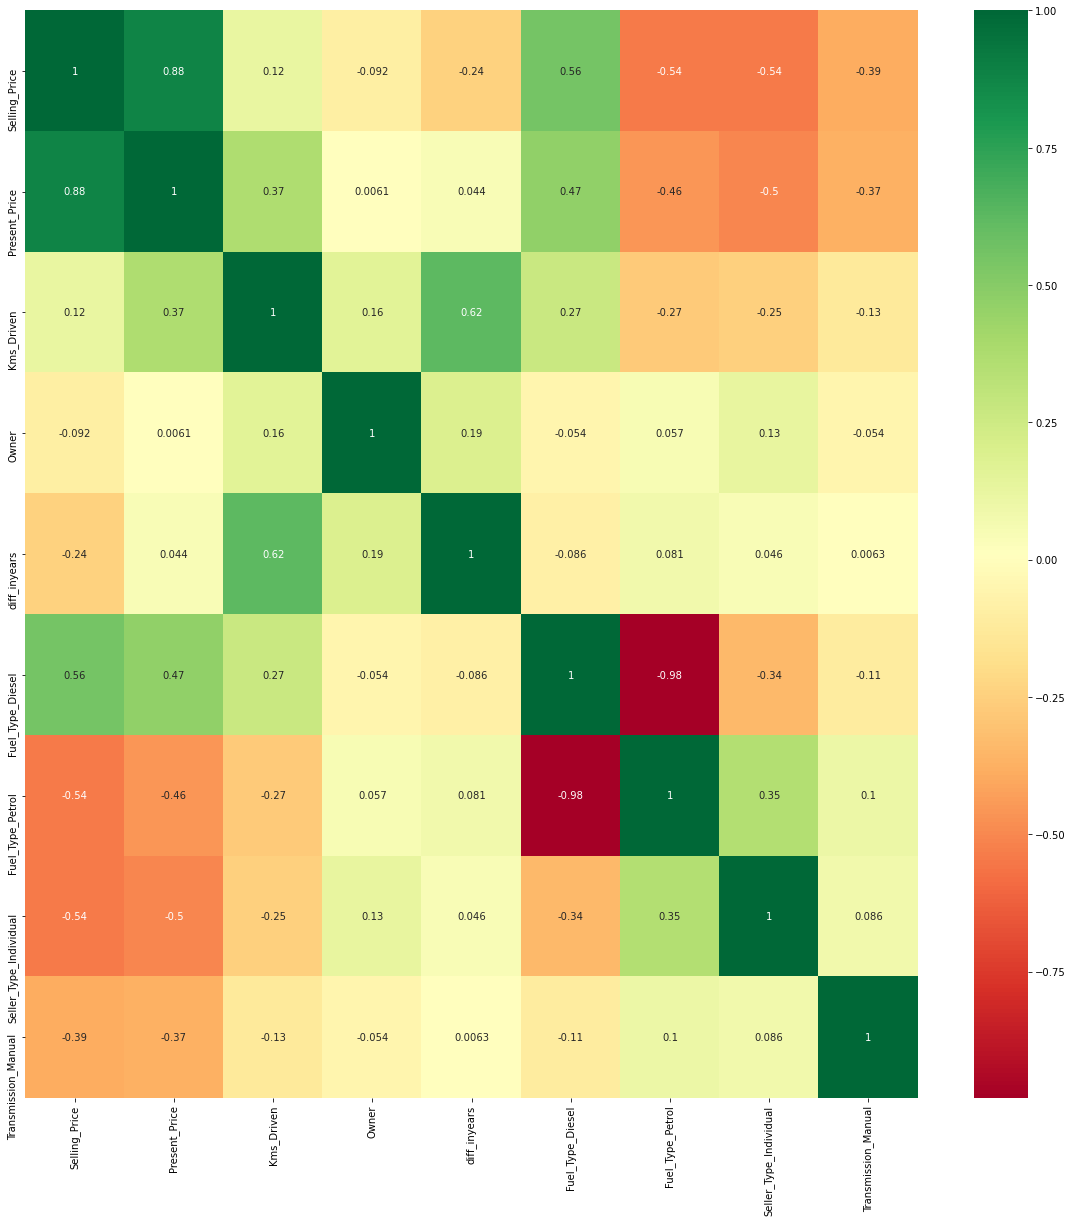

In [35]:
## Visualizing correalation using heat map

cor_mat = df.corr()
top_corr_features = cor_mat.index
plt.figure(figsize=(20,20))
## Heat map
map_cor = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Result: We can see that the Present price and Selling price is highly correlated and few are negatively correlated but since there are only few number of features we are going to consider all features in the dataset

In [36]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,diff_inyears,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [37]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [38]:
## Feature importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [39]:
print(model.feature_importances_)

[0.39803465 0.0404997  0.00040654 0.07585793 0.22147861 0.01257536
 0.11182695 0.13932027]


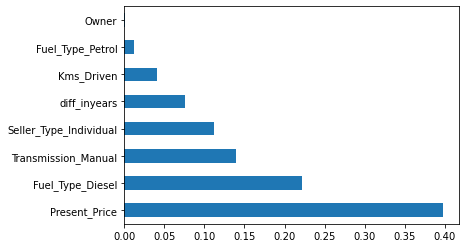

In [40]:
## Plot graph of feature importance

fear_importance = pd.Series(model.feature_importances_,index = X.columns)
fear_importance.nlargest(9).plot(kind = 'barh')
plt.show()

Result: It seems that the Present price has very great importance

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

###  Applying regression models

1. Linear Regression 
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression
5. Gradient Boosting regression

In [42]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [43]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

#### Linear Regression

Train R2-score : 0.89
Test R2-score : 0.87
Train CV scores : [0.769874   0.90047406 0.76638872 0.85954224 0.85936928]
Train CV mean : 0.83


C:\Users\VIMALA P T\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


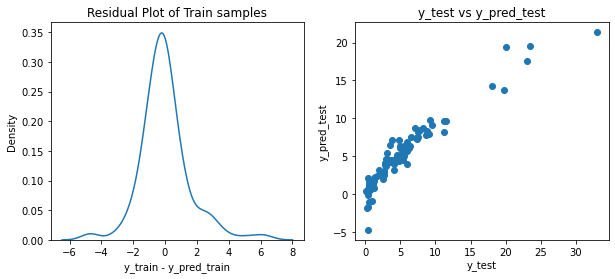

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor")

In [45]:
import pickle
# open a file, where you ant to store the data
file = open('Linear_Regression_model.pkl','wb')
# dump information to that file
pickle.dump(lr,file)

#### Ridge Regression

Train R2-score : 0.89
Test R2-score : 0.87
Train CV scores : [0.76987502 0.89512968 0.76584285 0.85004812 0.86397682]
Train CV mean : 0.83


C:\Users\VIMALA P T\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


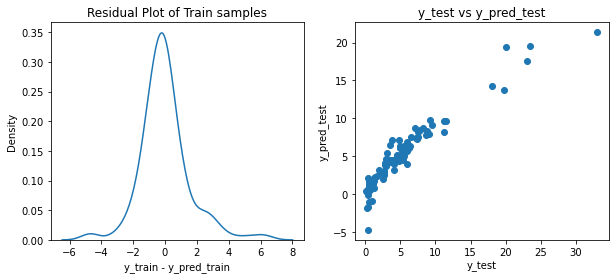

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge")

In [47]:
# open a file, where you ant to store the data
file = open('Ridge_Regression_model.pkl','wb')
# dump information to that file
pickle.dump(rg_rs,file)

#### Lasso

Train R2-score : 0.89
Test R2-score : 0.87
Train CV scores : [0.77328999 0.89793327 0.75579681 0.8569149  0.86284018]
Train CV mean : 0.83


C:\Users\VIMALA P T\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


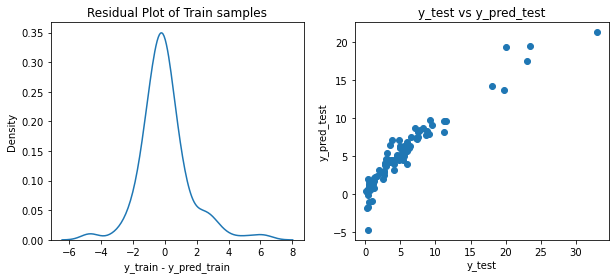

In [48]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

car_pred_model(ls_rs,"lasso")

In [49]:
# open a file, where you ant to store the data
file = open('Lasso_Regression_model.pkl','wb')
# dump information to that file
pickle.dump(ls_rs,file)

#### Random forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.95
Test R2-score : 0.94
Train CV scores : [0.87778244 0.92165863 0.76793477 0.9079101  0.95690046]
Train CV mean : 0.89


C:\Users\VIMALA P T\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


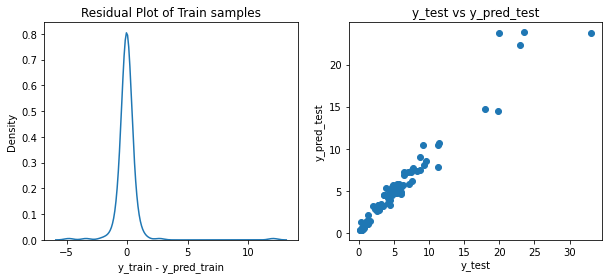

In [51]:
car_pred_model(rf_rs,'random_forest')

In [52]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=900)


In [61]:
# open a file, where you ant to store the data
file = open('Random_Forest_model.pkl','wb')
# dump information to that file
pickle.dump(rf_rs,file)

#### Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.94
Train CV scores : [0.96176706 0.92121149 0.8056819  0.9679501  0.96113197]
Train CV mean : 0.92


C:\Users\VIMALA P T\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\VIMALA P T\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


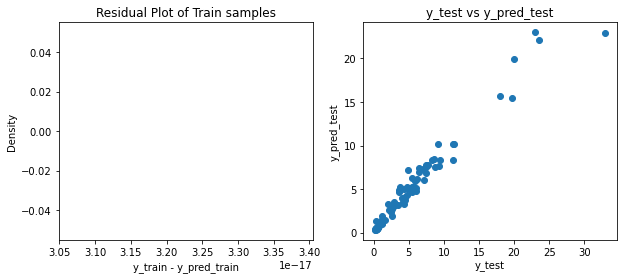

In [55]:
car_pred_model(gb_rs,"gradient_boosting")

In [56]:
print(gb_rs.best_params_)

{'n_estimators': 800, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 8, 'learning_rate': 0.2}


In [57]:
# open a file, where you ant to store the data
file = open('Gradient_Boosting_model.pkl','wb')
# dump information to that file
pickle.dump(gb_rs,file)

In [60]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV},)
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.89,0.87,0.83
1,Ridge,0.89,0.87,0.83
2,Lasso,0.89,0.87,0.83
3,RandomForestRegressor,0.95,0.94,0.89
4,GradientBoostingRegressor,1.00,0.94,0.92
